# **ANN Code Preperation**
- Load in the data
 - MNIST Dataset
 - 10 Digits (0-9)
 - Already Included in tensorflow
 - Converted in greyscale
- Build the model
 - Sequential dense layers ending with multiclass logistic regression
- Train the Model
 - Exactly the same as before!
- Evaluate the Model
 - Again same
- Make predictions

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [25]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 #normalize to scale them to 0 - 1
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28)


In [26]:
# Build the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), # 20% dropout of nodes at each input layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
# Train the Model
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.9133 - val_loss: 0.1410 - val_accuracy: 0.9562
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1433 - accuracy: 0.9573 - val_loss: 0.1047 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1066 - accuracy: 0.9673 - val_loss: 0.0858 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0876 - accuracy: 0.9729 - val_loss: 0.0794 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9766 - val_loss: 0.0731 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9790 - val_loss: 0.0719 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9815 - val_loss: 0.0709 - val_accuracy:

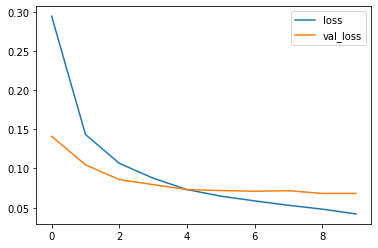

In [29]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

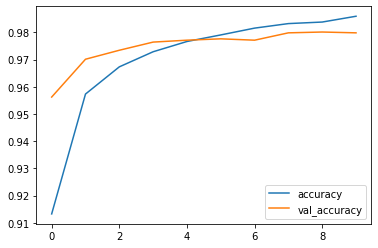

In [30]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [32]:
# Evaluate the Model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0681 - accuracy: 0.9798
[0.06814268976449966, 0.9797999858856201]


Confusion matrix without normalization: 
[[ 971    0    2    0    0    1    3    1    2    0]
 [   0 1128    3    0    0    1    2    0    1    0]
 [   2    2 1011    3    1    0    2    7    3    1]
 [   0    0    2  990    0    7    1    5    2    3]
 [   2    0    2    0  949    0    8    3    2   16]
 [   2    1    0    4    1  870    6    0    6    2]
 [   5    3    0    1    1    3  945    0    0    0]
 [   1    4    8    2    0    0    0 1007    2    4]
 [   5    0    3    5    2    3    6    3  944    3]
 [   1    2    0    8    6    2    0    5    2  983]]


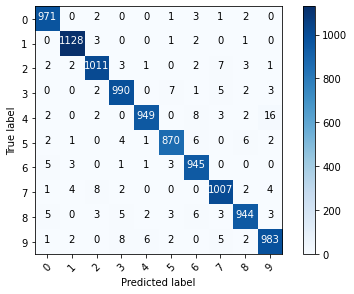

In [47]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title ='Confusion Matrix', cmap = plt.cm.Blues) :
    if normalize:
        cm = cm.astyle('float')/ cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix: ")
    else:
        print("Confusion matrix without normalization: ")
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title = title
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i , format(cm[i,j], fmt), 
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True Label: 9 Predicted Label: 3')

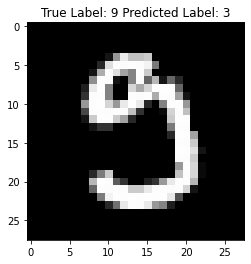

In [76]:
from importlib import reload
plt = reload(plt)

# show some missclassified examples
missclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_index)
# print(missclassified_index)
plt.imshow(x_test[i], cmap='gray')
ptest, ytest = str(p_test[i]), str(y_test[i])
plt.title("True Label: {} Predicted Label: {}".format(ytest, ptest))
